In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('group14_train.txt', sep=" ", header=None)
test = pd.read_csv('group14_test.txt', sep=" ", header=None)
val = pd.read_csv('group14_val.txt', sep=" ", header=None)

# take a look at the dataset
train.head(5)

,0,1,2
0,10.0,-7.2,-40.3190
1,0.8,-8.4,-62.8800
2,8.0,-5.2,-19.7320
3,-2.0,3.2,-3.3459
4,4.8,3.6,-11.0860


In [0]:
train_X = np.asanyarray(train[[0,1]])
train_y = np.asanyarray(train[2])
test_X = np.asanyarray(test[[0,1]])
test_y = np.asanyarray(test[2])
val_X = np.asanyarray(val[[0,1]])
val_y = np.asanyarray(val[2])

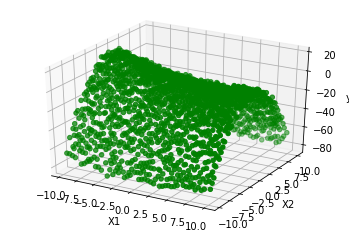

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train[0], train[1], train_y,  color='green')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y")
plt.show()

In [0]:
X_aug = np.ones((train_X.shape[0], 3))
X_aug[:, 1:3] = train_X
X_val_aug = np.ones((val_X.shape[0], 3))
X_val_aug[:, 1:3] = val_X
X_test_aug = np.ones((test_X.shape[0], 3))
X_test_aug[:, 1:3] = test_X

In [0]:
W = np.dot(np.dot(np.linalg.pinv(np.dot(np.transpose(X_aug), X_aug)), np.transpose(X_aug)), train_y)

In [0]:
y_prediction = np.dot(X_aug, W)
y_val_prediction = np.dot(X_val_aug, W)
y_test_prediction = np.dot(X_test_aug, W)

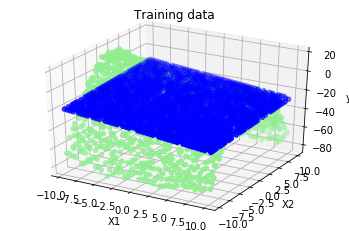

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train[0], train[1], train_y,  color='lightgreen')
ax.scatter(train[0], train[1], y_prediction, color='blue')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y")
ax.set_title('Training data')
plt.show()

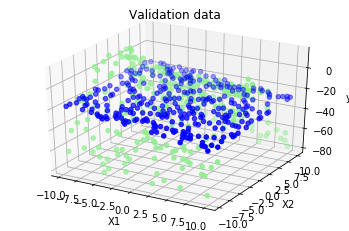

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(val[0], val[1], val_y,  color='lightgreen')
ax.scatter(val[0], val[1], y_val_prediction, color='blue')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y")
ax.set_title('Validation data')
plt.show()

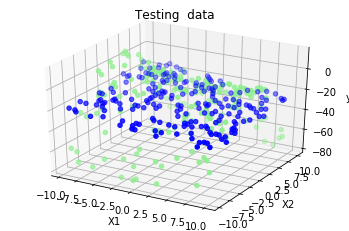

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(test[0], test[1], test_y,  color='lightgreen')
ax.scatter(test[0], test[1], y_test_prediction, color='blue')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y")
ax.set_title('Testing  data')
plt.show()

In [0]:
train_loss_RMS = np.sqrt(np.mean(np.square(y_prediction-train_y)))
val_loss_RMS = np.sqrt(np.mean(np.square(y_val_prediction-val_y)))
test_loss_RMS = np.sqrt(np.mean(np.square(y_test_prediction-test_y)))
losses={'train_loss': train_loss_RMS, 'validation_loss': val_loss_RMS, 'test_loss': test_loss_RMS}

In [12]:
losses

{'test_loss': 22.720753909010238,
 'train_loss': 23.67494351182997,
 'validation_loss': 23.93255487372694}

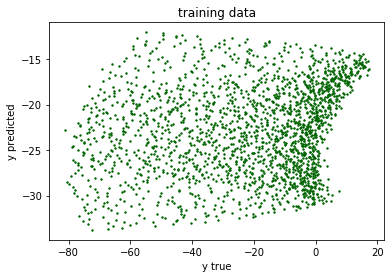

In [13]:
plt.title('training data')
plt.xlabel('y true')
plt.ylabel('y predicted')
plt.scatter(train_y, y_prediction, s = 2, color = 'darkgreen')
plt.show()

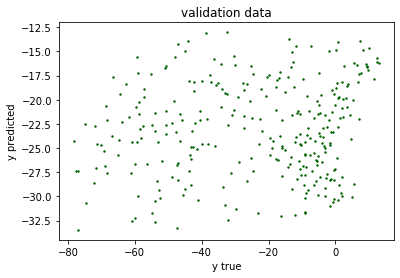

In [14]:
plt.title('validation data')
plt.xlabel('y true')
plt.ylabel('y predicted')
plt.scatter(val_y, y_val_prediction, s = 2, color = 'darkgreen')
plt.show()

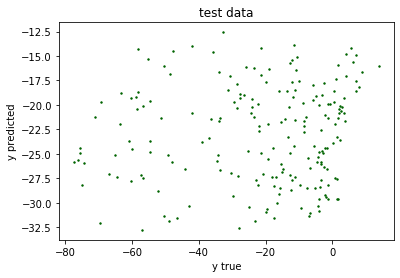

In [15]:
plt.title('test data')
plt.xlabel('y true')
plt.ylabel('y predicted')
plt.scatter(test_y, y_test_prediction, s = 2, color = 'darkgreen')
plt.show()